In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# Cell 2: Load and Preprocess Data
# Define the directories for 'YES' and 'NO' images
heatmap_dir_yes = 'dataset/trainYES/' 
heatmap_dir_no = 'dataset/trainNO/'   

# List to store features and labels
features = []
labels = []

# Function to process images in a given directory
def process_images(dir_path, label):
    count = 0
    for heatmap_file in os.listdir(dir_path):
        if heatmap_file.endswith('.png'):
            # Load the heatmap image
            heatmap = cv2.imread(os.path.join(dir_path, heatmap_file), cv2.IMREAD_GRAYSCALE)
            
            # Resize image to a fixed size (e.g., 64x64)
            heatmap_resized = cv2.resize(heatmap, (64, 64))
            
            # Flatten the image to create a feature vector
            feature_vector = heatmap_resized.flatten()
            
            # Append the feature vector and label to the lists
            features.append(feature_vector)
            labels.append(label)
            
            count += 1
            print(f"Processed {count} images from {dir_path}")

# Process images in both directories
process_images(heatmap_dir_yes, 1)  # Label '1' for 'YES' (design is correct)
process_images(heatmap_dir_no, 0)   # Label '0' for 'NO' (design is not correct)

# Convert features and labels to NumPy arrays
X = np.array(features)
y = np.array(labels)

print(f"Total images processed: {len(features)}")

Processed 1 images from dataset/trainYES/
Processed 2 images from dataset/trainYES/
Processed 3 images from dataset/trainYES/
Processed 4 images from dataset/trainYES/
Processed 5 images from dataset/trainYES/
Processed 6 images from dataset/trainYES/
Processed 7 images from dataset/trainYES/
Processed 8 images from dataset/trainYES/
Processed 9 images from dataset/trainYES/
Processed 10 images from dataset/trainYES/
Processed 11 images from dataset/trainYES/
Processed 12 images from dataset/trainYES/
Processed 13 images from dataset/trainYES/
Processed 14 images from dataset/trainYES/
Processed 15 images from dataset/trainYES/
Processed 16 images from dataset/trainYES/
Processed 17 images from dataset/trainYES/
Processed 18 images from dataset/trainYES/
Processed 19 images from dataset/trainYES/
Processed 20 images from dataset/trainYES/
Processed 21 images from dataset/trainYES/
Processed 22 images from dataset/trainYES/
Processed 23 images from dataset/trainYES/
Processed 24 images 

In [15]:
# features = []
# labels = []

# # Function to process images for CNN input
# def process_images(dir_path, label):
#     for heatmap_file in os.listdir(dir_path):
#         if heatmap_file.endswith('.png'):
            
#             # Load the heatmap image in grayscale
#             heatmap = cv2.imread(os.path.join(dir_path, heatmap_file), cv2.IMREAD_GRAYSCALE)

#             # Resize image to a fixed size (e.g., 64x64)
#             heatmap_resized = cv2.resize(heatmap, (64, 64))
            
#             # Normalize pixel values to [0, 1]          
#             heatmap_resized = heatmap_resized / 255.0
            
#             # Add a channel dimension for CNN input (64, 64, 1)
#             heatmap_resized = np.expand_dims(heatmap_resized, axis=-1)
            
#             # Append the processed image and label
#             features.append(heatmap_resized)
#             labels.append(label)

# # Process images in both directories
# process_images(heatmap_dir_yes, 1)  # Label '1' for 'YES'
# process_images(heatmap_dir_no, 0)   # Label '0' for 'NO'

In [16]:
features = np.array(features)
labels = np.array(labels)

In [17]:
# Cell 3: Model Training and Evaluation

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X, y)

# Best parameters from GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Train the classifier with best parameters
best_clf = grid_search.best_estimator_

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'best_random_forest_model.joblib'
joblib.dump(best_clf, model_filename)
print(f"Model saved to {model_filename}")

# Load the trained model from the file
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

# Make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Cross-Validation Scores: [0.94810357 0.94889267 0.95468484 0.95479841 0.95502555]
Mean CV Score: 0.9523010084368938
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  32.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  32.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  32.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  33.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  33.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  32.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV

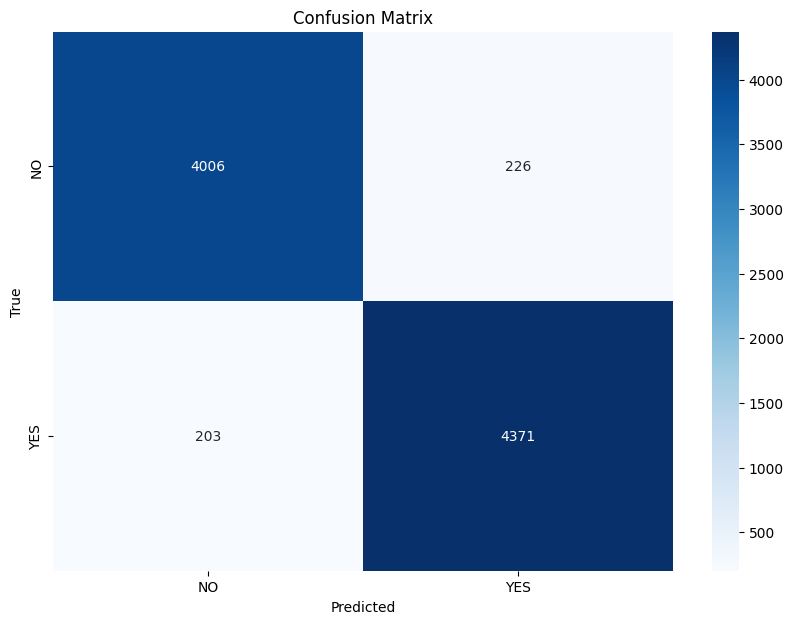

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
plot_confusion_matrix(y_test, y_pred, classes=['NO', 'YES'])

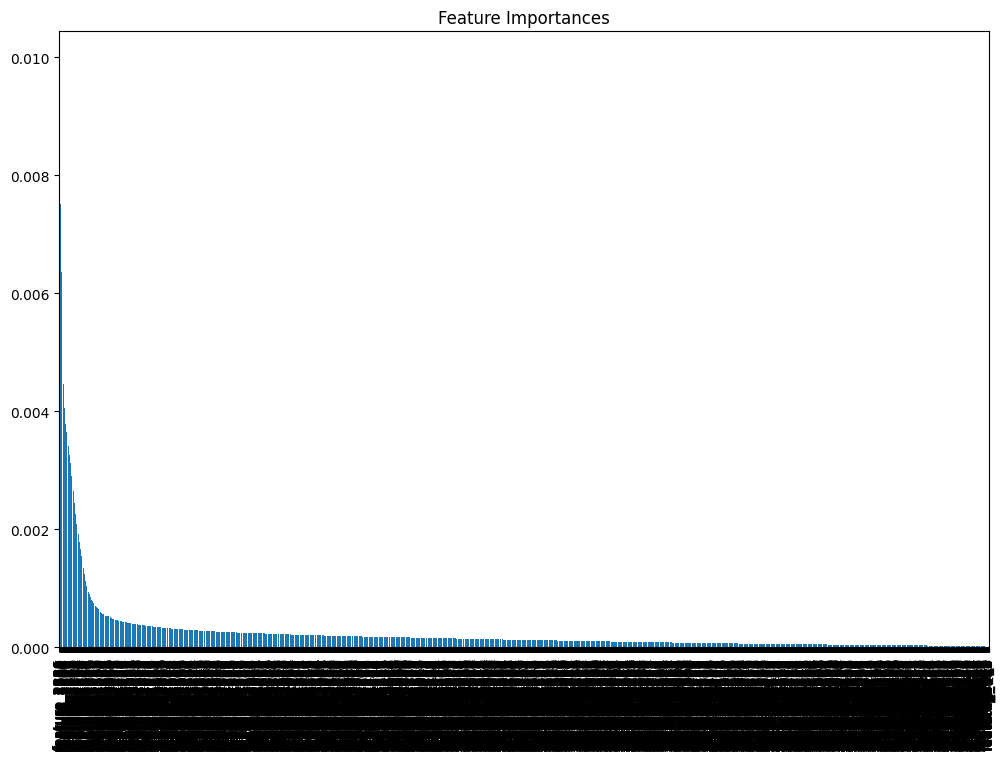

In [19]:
# Feature Importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

# Example usage
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
plot_feature_importance(loaded_model, feature_names)

In [24]:
import joblib
import cv2

# Load the trained model from the file
model_filename = 'best_random_forest_model.joblib'
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

def recommend_ui_change(heatmap_file, model):
    """
    Predict whether the design is correct or not based on the provided heatmap file.

    Parameters:
    - heatmap_file: Path to the heatmap PNG file to be evaluated.
    - model: The trained classifier model.

    Returns:
    - Recommendation message based on the prediction.
    """
    # Load and preprocess the heatmap image
    heatmap = cv2.imread(heatmap_file, cv2.IMREAD_GRAYSCALE)
    if heatmap is None:
        raise ValueError("Image not found or cannot be read.")
    
    # Resize image to the same size used during training
    heatmap_resized = cv2.resize(heatmap, (64, 64))
    feature_vector = heatmap_resized.flatten().reshape(1, -1)
    
    # Predict whether a change is needed
    prediction = model.predict(feature_vector)
    
    # Return recommendation based on prediction
    if prediction == 1:
        return "Recommendation: No change needed."
    else:
        return "Recommendation: Consider changing the UI element."

# Example usage
heatmap_file = 'testfiles/testNegative.png'  # Replace with the path to your test image

recommendation = recommend_ui_change(heatmap_file, loaded_model)
print(recommendation)

Model loaded successfully
Recommendation: Consider changing the UI element.
